In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# set default figure size
plt.rcParams['figure.figsize'] = (15, 7.0)

In [2]:
heart_data = 'heart.csv'

heart_df = pd.read_csv(heart_data)

heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# describe the data
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
# drop duplicates if any
heart_df.drop_duplicates()

# check missing valus
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'output Column Distribution')

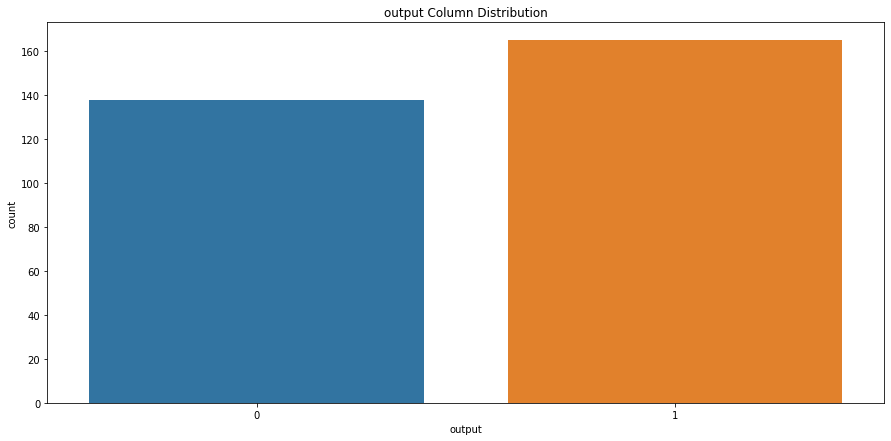

In [6]:
# check output column class distribution
sns.countplot(x='output', data=heart_df).set_title("output Column Distribution")

Text(0.5, 1.0, 'Sex Column Distribution')

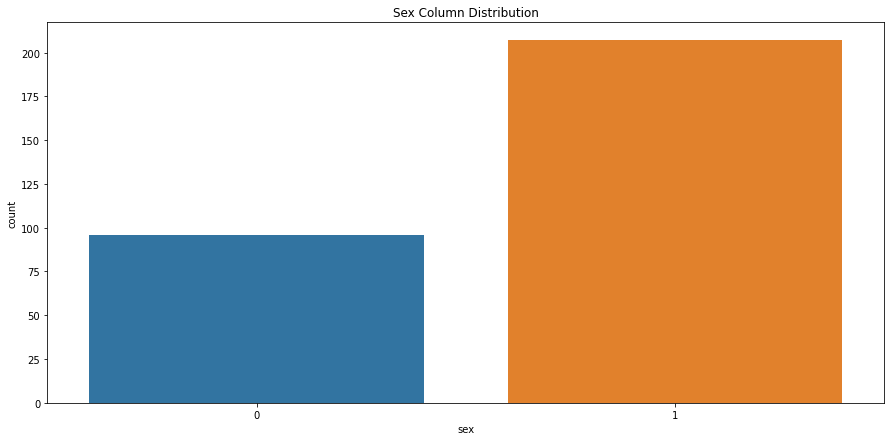

In [7]:
# check sex column class distribution
sns.countplot(x='sex', data=heart_df).set_title("Sex Column Distribution")

<AxesSubplot:xlabel='output', ylabel='chol'>

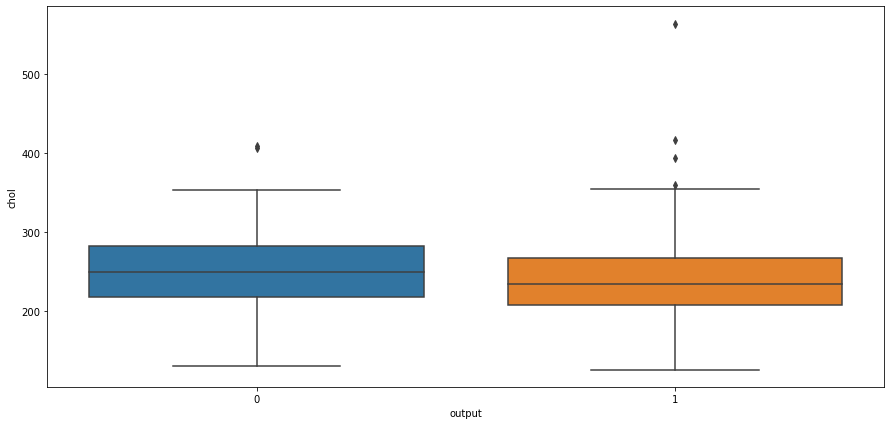

In [8]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="chol",data=heart_df)

<AxesSubplot:xlabel='output', ylabel='thalachh'>

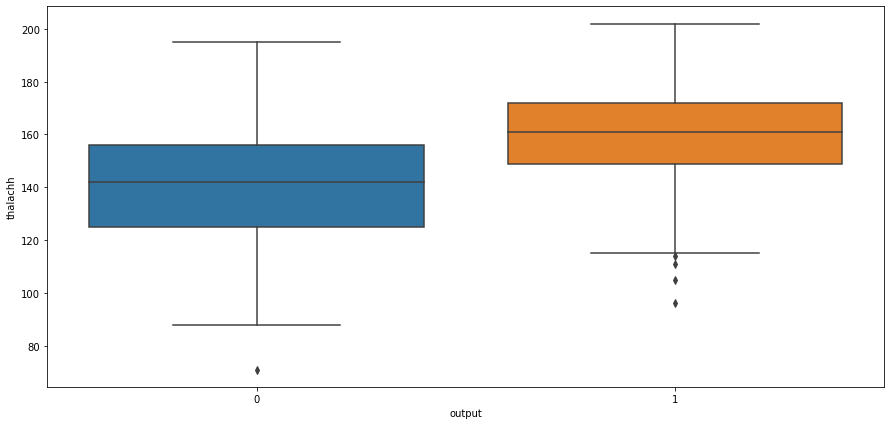

In [9]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="thalachh",data=heart_df)

<AxesSubplot:xlabel='output', ylabel='oldpeak'>

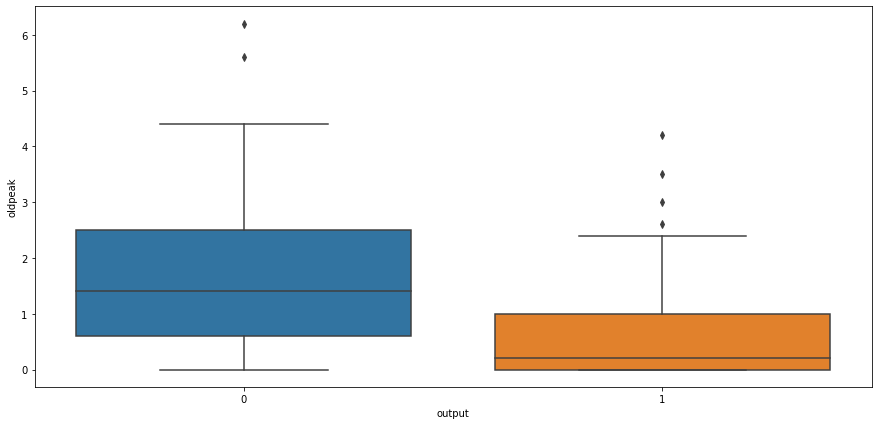

In [10]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="oldpeak",data=heart_df)

<AxesSubplot:xlabel='output', ylabel='age'>

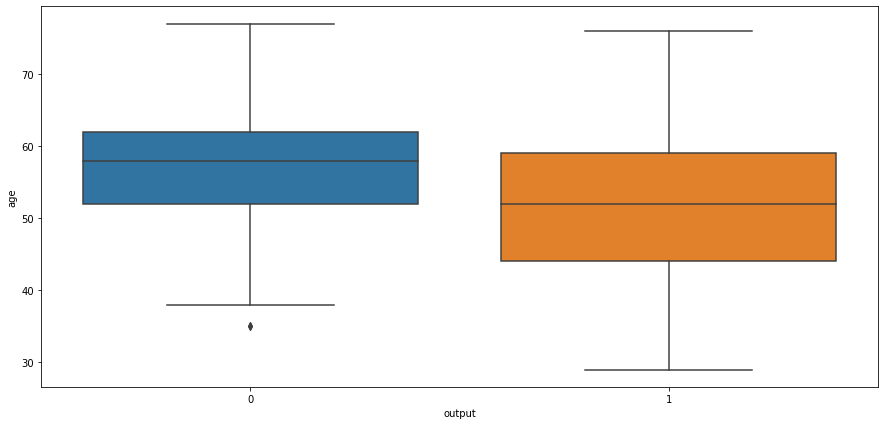

In [11]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="age",data=heart_df)

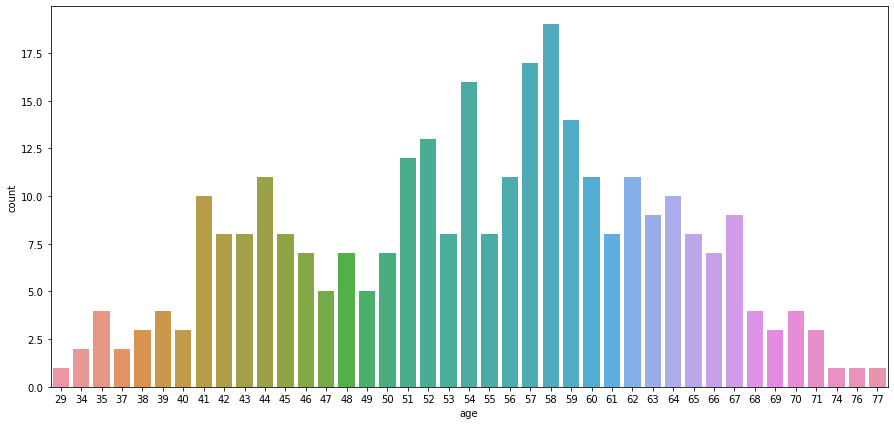

In [12]:
ax = sns.countplot(x='age', data=heart_df)

Text(0.5, 1.0, 'Columns Correlation')

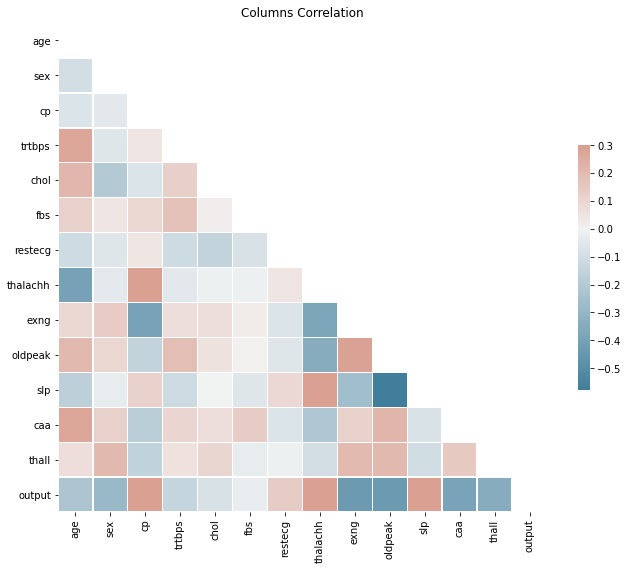

In [13]:
# check correlation
corr = heart_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Columns Correlation")

In [ ]:
# split data for training
y = heart_df.output.to_numpy()
X = heart_df.drop('output', axis=1).to_numpy()

# scale X values
scaler = StandardScaler()
X = scaler.fit_transform(X)
63
# split data while keeping output class distribution consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
# convert data to pytorch tensors
def df_to_tensor(df):
    return torch.from_numpy(df).float()

X_traint = df_to_tensor(X_train)
y_traint = df_to_tensor(y_train)
X_testt = df_to_tensor(X_test)
y_testt = df_to_tensor(y_test)

In [16]:
# create pytorch dataset
train_ds = TensorDataset(X_traint, y_traint)
test_ds = TensorDataset(X_testt, y_testt)

# create data loaders
batch_size = 4
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=False)

In [17]:
# model architecture
class BinaryNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 8)
        self.out = nn.Linear(8, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        x = F.relu(x)
        x = self.out(x)
        return torch.sigmoid(x) # scaling values between 0 and 1

In [18]:
input_size = 13 # number of features
output_size = 1
model = BinaryNetwork(input_size, output_size)
loss_fn = nn.BCELoss() # Binary Cross Entropy
optim = torch.optim.Adam(model.parameters(), lr=1e-3) #Adam optim
model

BinaryNetwork(
  (l1): Linear(in_features=13, out_features=32, bias=True)
  (l2): Linear(in_features=32, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
    epoch_loss = 0
    for feat, target in train_dl:
        optim.zero_grad()
        out = model(feat)
        loss = loss_fn(out, target.unsqueeze(1))
        epoch_loss += loss.item()
        loss.backward()
        optim.step()
    losses.append(epoch_loss)
    # print loss every 10 
    if i % 10 == 0:
        print(f"Epoch: {i}/{epochs}, Loss = {loss:.5f}")

Epoch: 0/100, Loss = 0.85307
Epoch: 10/100, Loss = 0.15137
Epoch: 20/100, Loss = 0.04129
Epoch: 30/100, Loss = 0.25216
Epoch: 40/100, Loss = 0.01249
Epoch: 50/100, Loss = 0.02301
Epoch: 60/100, Loss = 0.00001
Epoch: 70/100, Loss = 0.00100
Epoch: 80/100, Loss = 0.00198
Epoch: 90/100, Loss = 0.00006


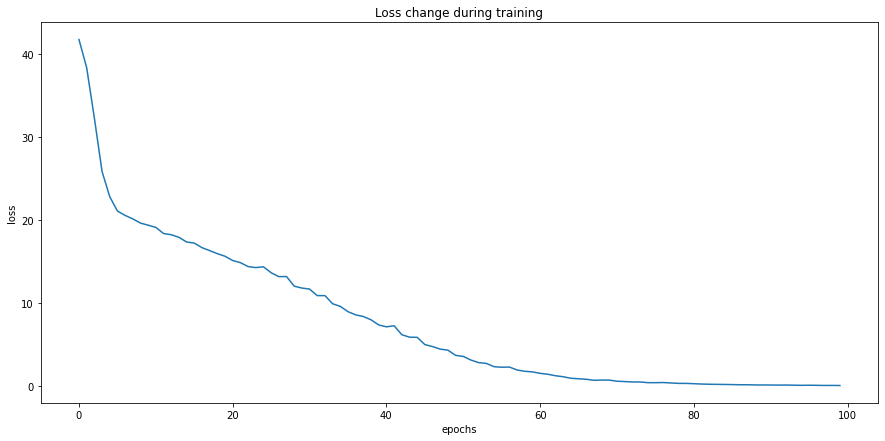

In [20]:
# plot losses
graph = sns.lineplot(x=[x for x in range(0, epochs)], y=losses)
graph.set(title="Loss change during training", xlabel='epochs', ylabel='loss')
plt.show()

In [21]:
# evaluate the model
y_pred_list = []
model.eval()
with torch.no_grad():
    for X, y in test_dl:
        y_test_pred = model(X)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag)

# convert predictions to a list of tensors with 1 dimention
y_pred_list = [a.squeeze() for a in y_pred_list]

<AxesSubplot:>

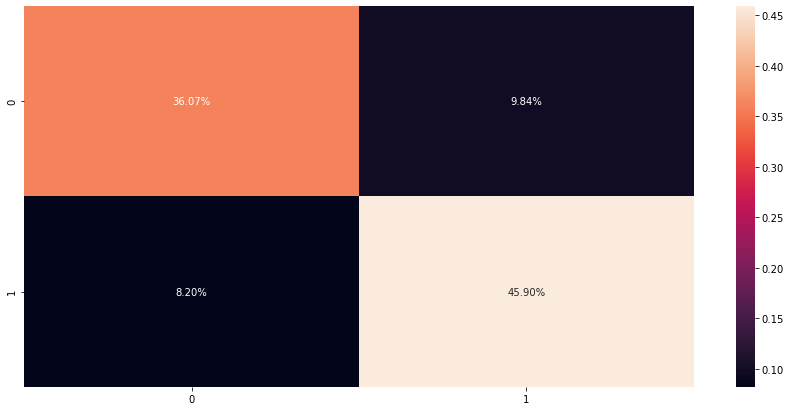

In [22]:
# check confusion matrix (hstack will merge all tensor lists into one list)
cfm = confusion_matrix(y_test, torch.hstack(y_pred_list))
sns.heatmap(cfm / np.sum(cfm), annot=True, fmt='.2%')

In [23]:
# print metrics
print(classification_report(y_test, torch.hstack(y_pred_list)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [24]:
torch.save(model, 'rnn1.pt')

In [28]:
print(X_traint[1,:])

tensor([ 0.9522, -1.4684, -0.9385,  1.0495,  3.1063, -0.4176, -1.0058,  0.1904,
        -0.6966,  2.5539, -0.6491,  2.2241,  1.1230])


In [35]:
print(y_traint[1])

tensor(0.)
